### 1. Upload dataset (.dta)

In [1]:
use "https://github.com/SaoriIwa/Stata-IE-Visual-Library/raw/develop/Library/Bar%20plots/Combined%20bar%20plots%20with%20two%20axes/data.dta", clear

(W4,S17B:FoodConsump version1.0)


### 2. Adjust variable for bar position

In [2]:
gen x = int1mo+.5

### 3. Create individual graphs

In [3]:
	foreach foodGroup in animal fruit grain veg starch processed_sugar {
		
		if "`foodGroup'" == "animal"			local graphTitle Animal Sourced
		if "`foodGroup'" == "fruit"				local graphTitle Fruit
		if "`foodGroup'" == "grain"				local graphTitle Grain
		if "`foodGroup'" == "veg"				local graphTitle Vegetables
		if "`foodGroup'" == "starch"			local graphTitle Starchy Foods
		if "`foodGroup'" == "processed_sugar"	local graphTitle Processed/Sugar

		qui twoway 	bar number_group x if food_group=="`foodGroup'", ///
				yaxis(1) ytitle("Avg. Number of Foods from" "Group Consumed Last Month", axis(1)) ///
				barwidth(.9) fintensity(inten0) lcolor(black) /// 
				xlabel(0 "0" 3 "3" 6 "6" 9 "9" 12 "12") ///
				ylabel(0 "0" 1 "1" 2 "2" 3 "3", axis(1)) || ///
				line total_exp int1mo if food_group=="`foodGroup'", ///
				yaxis(2) ytitle("Total Value of Exp." "1000 Real Tz Sh.", axis(2)) ///
				ylabel(0 "0" 500 "500" 1000 "1000" 1500 "1500" 2000 "2000" 2500 "2500", axis(2)) ///
				xlabel(3 "3" 6 "6" 9 "9" 12 "12") lwidth(1.2) ///
				title("`graphTitle'") xtitle("Month of Interview") ///
				graphregion(color(white)) bgcolor(white) ///
				legend(off) ///
				name("`foodGroup'") ///
				
	}

### 4. Combine graphs into one

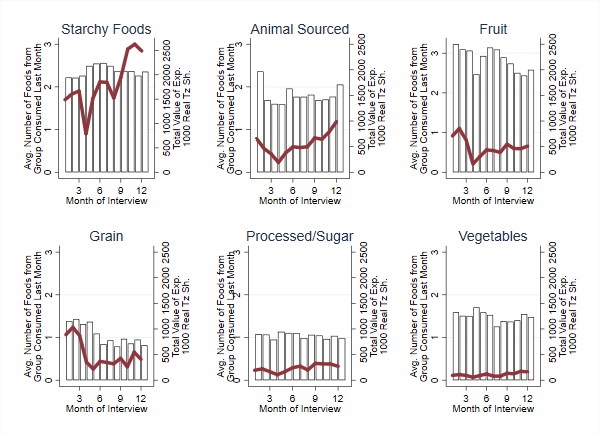

In [4]:
graph combine 	starch animal fruit grain processed_sugar veg, ///
				graphregion(color(white)) plotregion(color(white)) 

### 5. Export the graph

In [5]:
qui graph export "figure.png", as(png) replace